In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings #warning 없애기
warnings.filterwarnings(action='ignore')

<img src='logo.png'>

ref: https://www.kaggle.com/c/titanic

타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성

###  1. Data load
데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

In [3]:
os.getcwd()

'C:\\AI\\Python 3.8\\venv\\comp\\titanic'

In [4]:
train=pd.read_csv("./dataset/train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.shape

(891, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


sibSp: 함께 탑승한 부모, 아이의 수
parch: 함께 탑승한 부모, 아이의 수

### 2. EDA : 사전 데이터 탐색

탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

### Survived: Target Feature
target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.

0    549
1    342
Name: Survived, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


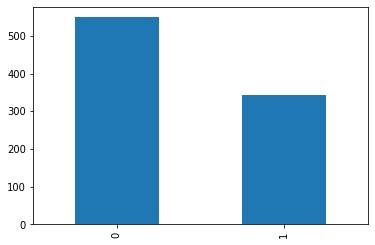

In [9]:
print(train['Survived'].value_counts(),train['Survived'].value_counts().plot(kind='bar'))

<AxesSubplot:ylabel='Survived'>

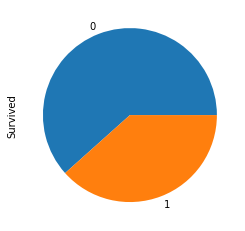

In [60]:
train['Survived'].value_counts().plot(kind='pie')

target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

3    491
1    216
2    184
Name: Pclass, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


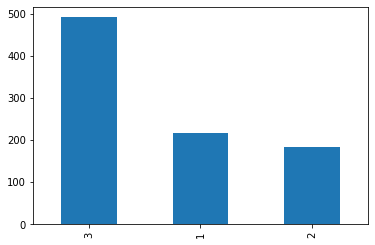

In [10]:
print(train['Pclass'].value_counts(),train['Pclass'].value_counts().plot(kind='bar'))

male      577
female    314
Name: Sex, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


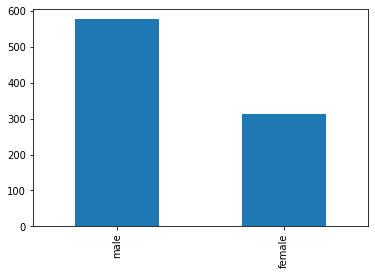

In [11]:
print(train['Sex'].value_counts(),train['Sex'].value_counts().plot(kind='bar'))

S    644
C    168
Q     77
Name: Embarked, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


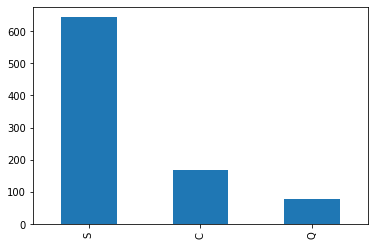

In [12]:
print(train['Embarked'].value_counts(),train['Embarked'].value_counts().plot(kind='bar'))

** 문법 공부 **

0    549
1    342
Name: Survived, dtype: int64
------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
------------------------------
male      577
female    314
Name: Sex, dtype: int64
------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------------------------


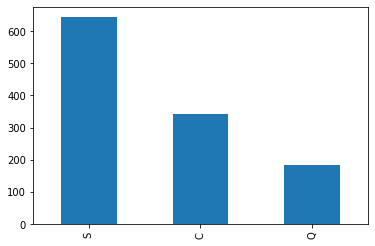

In [13]:
col_list = ['Survived','Pclass','Sex','Embarked']
for col in col_list:
    print(train[col].value_counts())
    train[col].value_counts().plot(kind='bar')
    print("---"*10)
    

In [14]:
def my_plot_bar(col):
    print(train[col].value_counts())
    train[col].value_counts().plot(kind='bar')

0    549
1    342
Name: Survived, dtype: int64


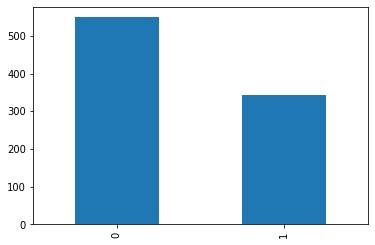

In [15]:
my_plot_bar('Survived')

unique(): 데이터에 고유값들에 어떠한 종류가 있는지 알고 싶을 때 사용</p>
nunique(): 데이터에 고유값들의 수를 출력 (데이터의 고유값의 총 수)</p>
value_counts(): 값별로 데이터의 수를 출력</p>
record 수 = unique 수 이면, 보통 분석 대상에서 제외(삭제)

In [16]:
arr=train['Age'].unique()
print(len(arr))  #array 개수 셀 때 len()을 사용한다. 

89


In [17]:
train['Age'].nunique() ## 위에랑 같은 문법. 값이 다른 이유는 nan값 때문

88

In [18]:
arr[0:5] #슬라이싱

array([22., 38., 26., 35., nan])

In [19]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

#### for문 연습 (nunique 동작 이해하기)

In [20]:
# for문 nunique() 연습
k=train.columns.to_list()
column = []
for i,col in enumerate(k):
    k[i]=train[col].nunique()
    column.append(col)
    print(column[i], ":", k[i])

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


In [21]:
#조건절 연습 nunique()가 650이상인 경우
for i in train.columns.tolist():
    if train[i].nunique()>=650:
        print(i, train[i].nunique())

#한 줄 코드
col_list = [i for i in train.columns.tolist() if train[i].nunique()>=650]
col_list

tr_nu = train.nunique(axis = 0)
utr = [{tr_nu.index[x]:i} for x,i in enumerate(tr_nu) if i > 650]
utr 

# 또 다른 방법
train.nunique()[train.nunique()>=650]

PassengerId 891
Name 891
Ticket 681


PassengerId    891
Name           891
Ticket         681
dtype: int64

In [22]:
round((248/891) *100)

28

In [23]:
k=train.columns.to_list()
column = []
for i,col in enumerate(k):
    k[i]=train[col].nunique()
    column.append(col)

# 딕셔너리로 프레임 만들 때
a =pd.DataFrame({'컬럼':column,"카운트":k})   
a['비율']=round((a['카운트']/891)*1000,1)
a.sort_values('비율',ascending=True)

,컬럼,카운트,비율
1,Survived,2,2.2
4,Sex,2,2.2
2,Pclass,3,3.4
11,Embarked,3,3.4
6,SibSp,7,7.9
7,Parch,7,7.9
5,Age,88,98.8
10,Cabin,147,165.0
9,Fare,248,278.3
8,Ticket,681,764.3


In [24]:
# 리스트로 데이터 프레임 만들 때 
a1=pd.DataFrame(k,column).reset_index()
a1.columns =['컬럼','카운트']
a1['비율']=round((a['카운트']/891)*1000,1)
a1.sort_values('비율',ascending=True)


,컬럼,카운트,비율
1,Survived,2,2.2
4,Sex,2,2.2
2,Pclass,3,3.4
11,Embarked,3,3.4
6,SibSp,7,7.9
7,Parch,7,7.9
5,Age,88,98.8
10,Cabin,147,165.0
9,Fare,248,278.3
8,Ticket,681,764.3


In [25]:
def my_dfcheck(prm='null'): #파라미터 : 'null' 또는 'unique'
    if prm == 'unique':
        print(train.nunique())
    else:
        print(train.isna().sum())
my_dfcheck('unique')

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [26]:
def my_dfcheck(prm='null'): #파라미터 : 'null' 또는 'unique'
    if prm == 'unique':
        s=train.nunique()
    else:
        s=train.isna().sum()
#     print(s.index)
#     print(s.values)
    
    dic = {'컬럼':s.index,"카운트":s.values}
    df = pd.DataFrame(dic)
    df['비율']=round((a['카운트']/891)*1000,1)
    return df.sort_values('비율',ascending=True)
my_dfcheck('unique')

,컬럼,카운트,비율
1,Survived,2,2.2
4,Sex,2,2.2
2,Pclass,3,3.4
11,Embarked,3,3.4
6,SibSp,7,7.9
7,Parch,7,7.9
5,Age,88,98.8
10,Cabin,147,165.0
9,Fare,248,278.3
8,Ticket,681,764.3


In [27]:
train.shape[0]

891

 ['PassengerId','Name','Ticket']는 분석하기에 적합하지 않은 컬럼이므로 삭제한다.

In [28]:
train[['Ticket','Survived']].value_counts().sort_values(ascending=False)

Ticket             Survived
CA. 2343           0           7
347082             0           7
347088             0           6
CA 2144            0           6
3101295            0           6
                              ..
STON/O 2. 3101280  0           1
PC 17604           1           1
PC 17603           1           1
A.5. 11206         0           1
WE/P 5735          1           1
Length: 730, dtype: int64

삭제 컬럼: ['PassengerId','Name','Ticket']

In [29]:
#train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
train.columns.difference(['Age']) # Age 제외한 컬럼 추출

Index(['Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

Name의 호칭을 통해 평균 나이를 본다. (Mr,Miss,Mrs 등등)

### 3. feature engineering & preprocessing: 피쳐 가공

모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만아닐라 test 도 똑같이 적용해주어야 합니다. 잊지맙시다.

### 3-1. 결측처리
null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.

In [31]:
train['Cabin'].unique()[:5]

array([nan, 'C85', 'C123', 'E46', 'G6'], dtype=object)

In [32]:
train[['Cabin','Survived']].value_counts()

Cabin    Survived
B96 B98  1           4
F33      1           3
E101     1           3
C52      1           2
B35      1           2
                    ..
C123     0           1
         1           1
C128     0           1
C148     1           1
T        0           1
Length: 163, dtype: int64

In [33]:
string = 'B96'
string[0]  #글자도 슬라이싱이 가능하다. 
train['Cabin']=train['Cabin'].str[0]

In [34]:
train[['Cabin','Survived']].value_counts()

Cabin  Survived
B      1           35
C      1           35
D      1           25
C      0           24
E      1           24
B      0           12
A      0            8
D      0            8
E      0            8
F      1            8
A      1            7
F      0            5
G      0            2
       1            2
T      0            1
dtype: int64

#### crosstab:범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용

In [35]:
pd.crosstab(index=train['Cabin'],columns = train['Survived'])

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


In [36]:
pd.crosstab(index=train['Cabin'],columns = train['Pclass'])

Pclass,1,2,3
Cabin,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
T,1,0,0


#### 3-1.1 결측치 > 공백처리 <br>
Cabin의 삭제여부 미정:Pclass 하나만 봐도 된다 

In [37]:
#결측치 공백처리
train['Cabin']=train['Cabin'].fillna('')
train['Cabin'].unique()

array(['', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### 3-1.2 Embarked: 최빈값 구하기 // 최빈값(mode): 가장 빈번하게 관찰/측정되는 값

In [38]:
#최빈값으로 결측치 fillna()
train['Embarked'].value_counts()
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode().values[0])
train['Embarked'].isnull().sum()

0

In [39]:
#pd.crosstab(train['Embarked'],train['Survived'])

#### 3-1.3 Age: Name 호칭을 사용해서 그들의 평균 나이로 채우기

In [40]:
avg_age = int(train['Age'].mean())
train['Age']=train['Age'].fillna(avg_age)
train['Age']=train['Age'].astype('int') # column casting
train['Age'].isnull().sum()

0

In [41]:
train.info() #결측처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [42]:
train[['Cabin','Sex','Embarked']].describe()

,Cabin,Sex,Embarked
count,891,891,891
unique,9,2,3
top,,male,S
freq,687,577,646


In [43]:
print(train['Cabin'].unique())
print(train['Sex'].unique())
print(train['Embarked'].unique())

['' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['male' 'female']
['S' 'C' 'Q']


#### 옵션 // 이렇게도 할 수 있다! 덜 번거로움

In [44]:
subdf=train.select_dtypes(include='object').columns
subdf.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### 3-2. object > numeric(수치) 변경

- map: 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용
-lambda 
-replace
-get_dummies

#### 3-2.1 map사용

In [45]:
sex_dict = {'male':1,'female':0}
train['Sex2']=train['Sex'].map(sex_dict)
train[['Sex2','Sex']].head()
#train.drop(['Sex2'],axis=1,inplace=True)

,Sex2,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male


#### 3-2.2 replace 사용

In [54]:
train['Embarked'] = train['Embarked'].replace(['S','C','Q'],[1,2,3]) #replace(old,new)

#### 3-2.3 lambda사용

In [47]:
train['Sex3']=train['Sex'].apply(lambda x: 1 if x=='male' else 0)
train[['Sex3','Sex']]
#train.drop(['Sex3'],axis=1,inplace=True)
#res = 0
#if x == 'male':
#    res =1
#else:
#    res=0

,Sex3,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male
...,...,...
886,1,male
887,0,female
888,0,female
889,1,male


#### 3-2.4 get_dummies 사용 // 현업에서 많이 사용 

In [48]:
#train2=train.copy()
train2=pd.get_dummies(train,columns=['Cabin'])
#train2.drop(['Embarked1'],axis=1,inplace=True)

#### 3-2. 5 object 컬럼 전체 결측처리 + One-Hot  / Label Encoding
One-Hot Encoding: (나만1 나머지는 0 변경)

결측처리한 후에 get_dummies를 하자!! </p>
모든 object 컬럼들의 결측값을 일괄로 처리하므로 원하는 결측 처리를 못한다.</p>
따라서, fillna()로 원하는 결측을 먼저 처리하고 get_dummies() 한다.

단점) unique한 값 만큼 컬럼이 새로 생긴다. </p>
꿀팁) 컬럼이 무수히 늘어나기 때문에, 모델학습 직전에 해주면 가공할 때 컬럼 보기 편하다.

### Label Encoding
 
 Label Encoding 이란 알파벳 오더 순으로 숫자를 할당해주는 것.
 
 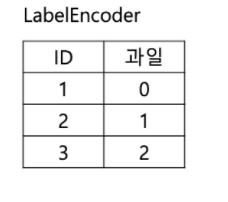
 
### One-Hot Encoding
 
0과 1로 이루어진 여러개의 열을 생성
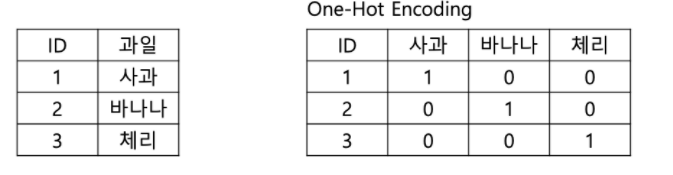

#### 연습

#### 실제 전처리

#### LabelEncoding
- Dataframe에 LabelEncoder 사용하려면, for col in  ~ 사용해야 한다. (한 개 컬럼씩 변경) </p>

단점) encoder = LabelEncoder(),</p>
      encoder.fit(['Sex','Cabin']) 에러!! 리스트로 끌고오면 안됨. for문 사용하자

In [ ]:
#train2.drop(train2.columns[-1],axis=1,inplace=True)
train2.head()

In [ ]:
# LabelEncoding
train2= train.copy()

# dataframe에서 LabelEncoding 사용하려면 for문으로 한개씩 컬럼을 변경해야 한다. 
label = ['Sex', 'Cabin', 'Embarked']
for i in label:
    encoder = LabelEncoder()
    encoder.fit(train2[i])
    train2[i]= encoder.transform(train2[i])

train2.head()

#### OneHotEncoding -- 원리는 get_dummies()와 똑같다.
아래 문법은 비추! get_dummies 쓰자 

단점: array - 2D이어야 하므로 .reshape(-1,1) 해줘야 한다. 

In [ ]:
#OneHotEncoding 비추 문법
encoder = OneHotEncoder(sparse = False)
encoder.fit(train2['Embarked'].values.reshape(-1,1)) #내가 가지고 있는 데이터에 fit한다
digit_label = encoder.transform(train2['Embarked'].values.reshape(-1,1))

train2['Embarked_S'] = digit_label[:,0].astype('int')
train2['Embarked_C'] = digit_label[:,0].astype('int')
train2['Embarked_Q'] = digit_label[:,0].astype('int')
#print(digit_label)
train2

In [ ]:
#get_dummies
train3 = train.copy()
dumm_df = pd.get_dummies(train3,prefix='dumm',prefix_sep='_',columns=['Embarked'])
dumm_df

복잡한 onehotencoder와 get_dummies의 결과는 같다. 따라서 더 쉬운 get_dummies를 쓰자.

#### 3-2.6 astype('category') casting을 이용한 수치 변환

In [53]:
train['Cabin']= train['Cabin'].astype('category').cat.codes #범주형으로 변환
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Sex3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,3,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,3,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,2,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,0,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,3,C,1,1


### 3.3 피쳐가공: 불필요한 컬럼 모두 삭제

In [57]:
#train.drop(['PassengerId','Name','Ticket','Sex','Sex3'],axis=1,inplace=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int8   
 7   Embarked  891 non-null    int64  
 8   Sex2      891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), int8(1)
memory usage: 53.2 KB


In [72]:
train.rename(columns={'Sex2':'Sex'}) #컬럼명 바꾸기

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
0,0,3,22,1,0,7.2500,0,1,1
1,1,1,38,1,0,71.2833,3,2,0
2,1,3,26,0,0,7.9250,0,1,0
3,1,1,35,1,0,53.1000,3,1,0
4,0,3,35,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0,1,1
887,1,1,19,0,0,30.0000,2,1,0
888,0,3,29,1,2,23.4500,0,1,0
889,1,1,26,0,0,30.0000,3,2,1


In [89]:
train=pd.read_csv("./dataset/train2.csv")

### 4. 모델학습

1. 지도학습: Supervisied learning - 분류, 회귀, 의사결정나무 등등 </br>
2. 비지도학습: Unsupervised learning - 군집 등등 

#### 4-1. train과 test 데이터 분리

In [90]:
from sklearn.model_selection import train_test_split

In [101]:
X = train[train.columns.difference(['Survived'])] 
#X = train.drop(['Survived'],axis=1) X가 대문자인 이유는 여러개를 가져오니깐
y = train['Survived'] #y는 예측값이 하나이므로 소문자로 쓴다

In [131]:
# 시계열 데이터일 때는 shuffle = False
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712,) (179,)


#### 4-2. 모델 선정 & 학습 & 예측 & 평가

랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다.

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100) # 모델 구성
rf.fit(X_train,y_train) #모델 학습
y_vld =rf.predict(X_test) #모델 예측

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_vld)
print(f"정확도:{acc_score:.4f}") #4f: 소수점 4자리

정확도:0.8156


* LogisticRegression: 로지스틱 회귀분석

In [134]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2')
lr.fit(X_train,y_train) #모델 학습
y_vld =lr.predict(X_test) #모델 예측
acc_score = accuracy_score(y_test,y_vld)
print(f"정확도:{acc_score:.4f}") #4f: 소수점 4자리

정확도:0.8603


c:\ai\python 3.8\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC


model_list=[RandomForestClassifier(n_estimators=100,random_state=1234),
            LogisticRegression(penalty='l2',random_state=1234),
            KNeighborsClassifier(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(),
            LinearSVC()]

for model in model_list:
    model.fit(X_train,y_train)
    y_vld = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_vld)
    print(f"{model.__class__.__name__} \t\t 정확도:{acc_score:.4f}") 


RandomForestClassifier 		 정확도:0.8156
LogisticRegression 		 정확도:0.8603
KNeighborsClassifier 		 정확도:0.7095
KNeighborsClassifier 		 정확도:0.7095
DecisionTreeClassifier 		 정확도:0.7933
LinearSVC 		 정확도:0.7821


#### 4-3 Feature importance </br>
- 학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.

- 쉽게 말해, 10 = 4x1 + 2x2 + 1*x3 을 생각하면, 우리는 x1이 결과값(10)에 큰 영향을 준다고 생각 할 수 있습니다. feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로, 이 모델에 가장 큰 영향을 미친다고 말할 수 있습니다.

- 학습된 모델은 기본적으로 featureimportances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.

- pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.

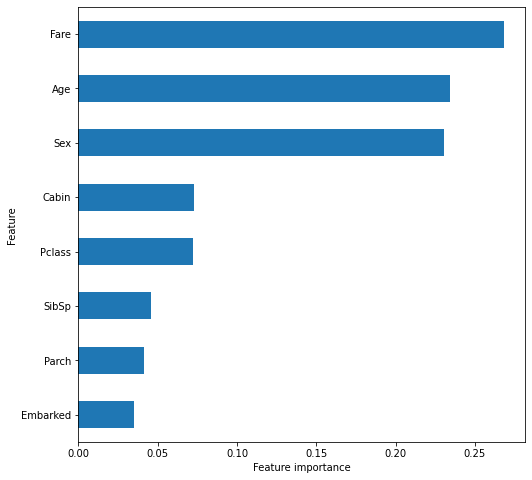

In [138]:
from pandas import Series

feature_importance = rf.feature_importances_
Series_feat_imp = Series(feature_importance, index=X.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보긴 해야합니다.

- featuure importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있습니다.